In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os, sys

sns.set_style("whitegrid")

In [15]:
alldata = pd.DataFrame()
gl_p_list = [("/q/storage/alogins/fcla_data/geometric_with_coords/greedy/solutions/", "Uniform"),
             ("/q/storage/alogins/fcla_data/clustered/greedy/solutions/", "Clustered")]
for gl_p, name in gl_p_list:
    fullp = gl_p + "fcla_greedy_rand_2"
    for f in os.listdir(fullp):
        d = json.load(open(os.path.join(fullp, f), "r"))
        r = {}
        r['Order'] = 'Hilbert'
        r['Graph'] = name
        r['Objective'] = d['objective']
        r['Runtime'] = d['runtime']
        alldata = alldata.append(r, ignore_index=True)

    fullp = gl_p + "fcla_greedy_rand"
    for f in os.listdir(fullp):
        d = json.load(open(os.path.join(fullp, f), "r"))
        r = {}
        r['Order'] = 'Random'
        r['Graph'] = name
        r['Objective'] = d['objective']
        r['Runtime'] = d['runtime']
        alldata = alldata.append(r, ignore_index=True)

    fullp = gl_p + "fcla_greedy_rand_3"
    for f in os.listdir(fullp):
        d = json.load(open(os.path.join(fullp, f), "r"))
        r = {}
        r['Order'] = 'Distance'
        r['Graph'] = name
        r['Objective'] = d['objective']
        r['Runtime'] = d['runtime']
        alldata = alldata.append(r, ignore_index=True)

    fullp = gl_p + "fcla"
    for f in os.listdir(fullp):
        d = json.load(open(os.path.join(fullp, f), "r"))
        r = {}
        r['Order'] = 'WMA'
        r['Graph'] = name
        r['Objective'] = d['objective']
        r['Runtime'] = d['runtime']
        alldata = alldata.append(r, ignore_index=True)

In [16]:
alldata.head()

,Graph,Objective,Order,Runtime
0,Uniform,82387.0,Hilbert,23.6562
1,Uniform,78736.0,Random,59.1140
2,Uniform,79186.0,Distance,57.5485
3,Uniform,37396.0,WMA,31.7123
4,Clustered,15534.0,Hilbert,36.6149


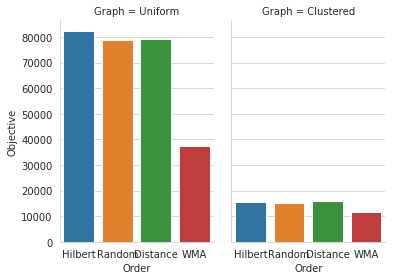

In [17]:
sns.catplot(x="Order", y="Objective", col="Graph", data=alldata, kind="bar", height=4, aspect=.7);
# sns.barplot(alldata['Objective'],alldata['Order'])